# **SOURCE**
https://www.kaggle.com/code/nkitgupta/who-will-leave-a-job/notebook

Features
- enrollee_id : Unique ID for candidate
- city: City code
- city_ development _index : Developement index of the city (scaled)
- gender: Gender of candidate
- relevent_experience: Relevant experience of candidate
- enrolled_university: Type of University course enrolled if any
- education_level: Education level of candidate
- major_discipline :Education major discipline of candidate
- experience: Candidate total experience in years
- company_size: No of employees in current employer's company
- company_type : Type of current employer
- lastnewjob: Difference in years between previous job and current job
- training_hours: training hours completed
- target: 0 – Not looking for job change, 1 – Looking for a job change

In [2]:
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None  # default='warn'

import warnings
warnings.filterwarnings('ignore')

In [3]:
pathTrain = 'https://raw.githubusercontent.com/mrazakqq/data-science-learning/main/dataset/hr-analytics-who-will-leave-the-job/aug_train.csv'
pathTest = 'https://raw.githubusercontent.com/mrazakqq/data-science-learning/main/dataset/hr-analytics-who-will-leave-the-job/aug_test.csv'

data = pd.read_csv(pathTrain)
dataTesting = pd.read_csv(pathTest)

In [4]:
data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [5]:
dataTesting

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


# **DATA UNDERSTANDING**

In [6]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [7]:
data.describe(include='object')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [8]:
dtype = data.dtypes
missingValue = data.isnull().sum()
missingValuePercent = round(missingValue/len(data)*100, 0)
memoryUsage = data.memory_usage(deep=True)
columns={
    0:'missing_value',
    1:'missing_value_percentage',
    2:'memory_usage_bytes',
    3:'dtype'}

print(f'Dataset dimensions\t: {data.shape}')
print(f'Rows duplicated\t\t: {data.duplicated().sum()}')

infoData = pd.concat([missingValue, missingValuePercent, memoryUsage, dtype], axis=1)
# infoData.rename(columns=columns)
infoData.drop(index='Index').rename(columns=columns)
# memoryUsage

Dataset dimensions	: (19158, 14)
Rows duplicated		: 0


,missing_value,missing_value_percentage,memory_usage_bytes,dtype
enrollee_id,0.0,0.0,153264,int64
city,0.0,0.0,1235888,object
city_development_index,0.0,0.0,153264,float64
gender,4508.0,24.0,1040573,object
relevent_experience,0.0,0.0,1527274,object
enrolled_university,386.0,2.0,1341257,object
education_level,460.0,2.0,1231558,object
major_discipline,2813.0,15.0,1095945,object
experience,65.0,0.0,1121964,object
company_size,5938.0,31.0,1023519,object


## **Test Handle Null Values**

In [9]:
dataDummy = data.copy()
dataDummy.gender.fillna('NAN', inplace=True)
dataDummy.enrolled_university.fillna('Other', inplace=True)
dataDummy.education_level.fillna('Other', inplace=True)
dataDummy.major_discipline.fillna('Other', inplace=True)
dataDummy.experience.fillna('Other', inplace=True)
dataDummy.company_size.fillna('Other', inplace=True)
dataDummy.company_type.fillna('Other', inplace=True)
dataDummy.last_new_job.fillna('Other', inplace=True)

## **Categorical**

#### **city**

In [10]:
city = (pd.DataFrame([dataDummy.city.value_counts(), (round(dataDummy.city.value_counts()*100/len(dataDummy.city), 1))], 
                    index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'city'})
city
gender = (pd.DataFrame([dataDummy.gender.value_counts(), (round(dataDummy.gender.value_counts()*100/len(dataDummy.gender), 1))], 
                    index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'gender'})
gender
gender = (pd.DataFrame([dataDummy.gender.value_counts(), (round(dataDummy.gender.value_counts()*100/len(dataDummy.gender), 1))], 
                    index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'gender'})
gender

,gender,count,percentage
0,Male,13221.0,69.0
1,NAN,4508.0,23.5
2,Female,1238.0,6.5
3,Other,191.0,1.0


# **EXPLORATORY DATA ANALYSIS**

In [11]:
dataDummy1 = dataDummy[dataDummy.target == 1]
dataDummy1

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Other,Other,1,36,1.0
3,33241,city_115,0.789,NAN,No relevent experience,Other,Graduate,Business Degree,<1,Other,Pvt Ltd,never,52,1.0
5,21651,city_176,0.764,NAN,Has relevent experience,Part time course,Graduate,STEM,11,Other,Other,1,24,1.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1.0
19148,9212,city_21,0.624,NAN,Has relevent experience,no_enrollment,Masters,STEM,3,100-500,Pvt Ltd,3,40,1.0
19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1.0
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,Other,Other,1,42,1.0


In [52]:
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={
          'figure.figsize': (16, 9)
        })
sns.set_context("notebook", rc={"font.size":14,
                                "axes.titlesize":20,
                                "axes.labelsize":14})

## **Null Values Investigation**

In [13]:
data.count().sort_values()

company_type              13018
company_size              13220
gender                    14650
major_discipline          16345
education_level           18698
last_new_job              18735
enrolled_university       18772
experience                19093
enrollee_id               19158
city                      19158
city_development_index    19158
relevent_experience       19158
training_hours            19158
target                    19158
dtype: int64

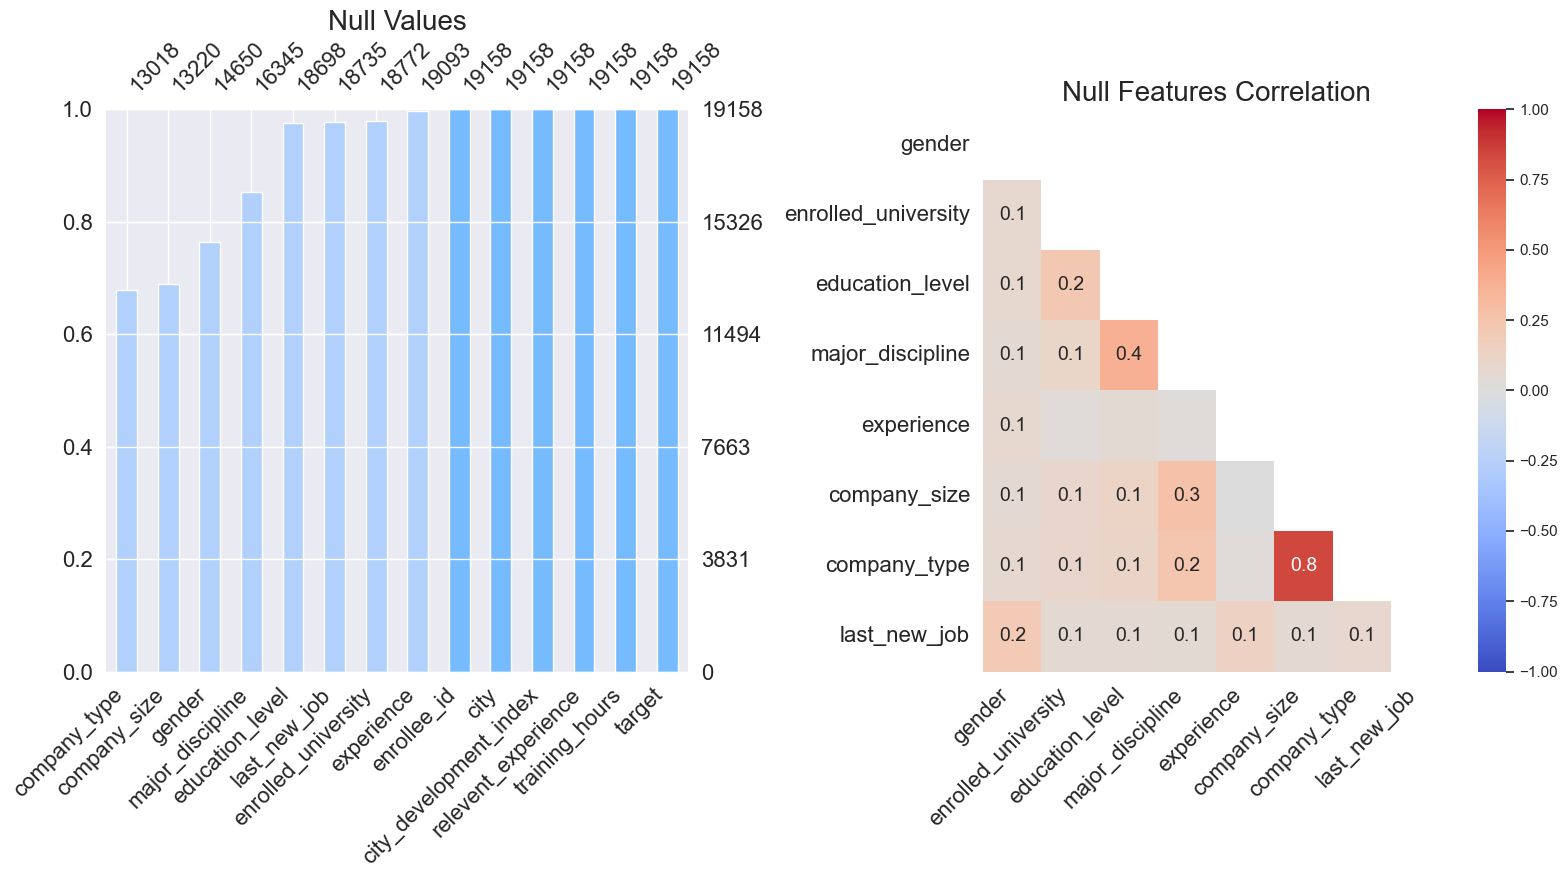

In [14]:
d = data.count().sort_values()
barpallete = ['xkcd:powder blue' if (x < max(d)) else 'xkcd:sky blue' for x in d]

f, ax = plt.subplots(1,2)
missingno.bar(data, color=barpallete, sort='ascending', ax=ax[0])
missingno.heatmap(data, cmap='coolwarm', ax=ax[1])
ax[0].set_title('Null Values')
ax[1].set_title('Null Features Correlation')
plt.tight_layout()

## **Correlation**
Korelasi dicari menggunakan library dython berbasis feature selection ANOVA untuk menghitung korelasi antara Categorical-Numerical Features karena sebagaian besar features merupakan categorical features.

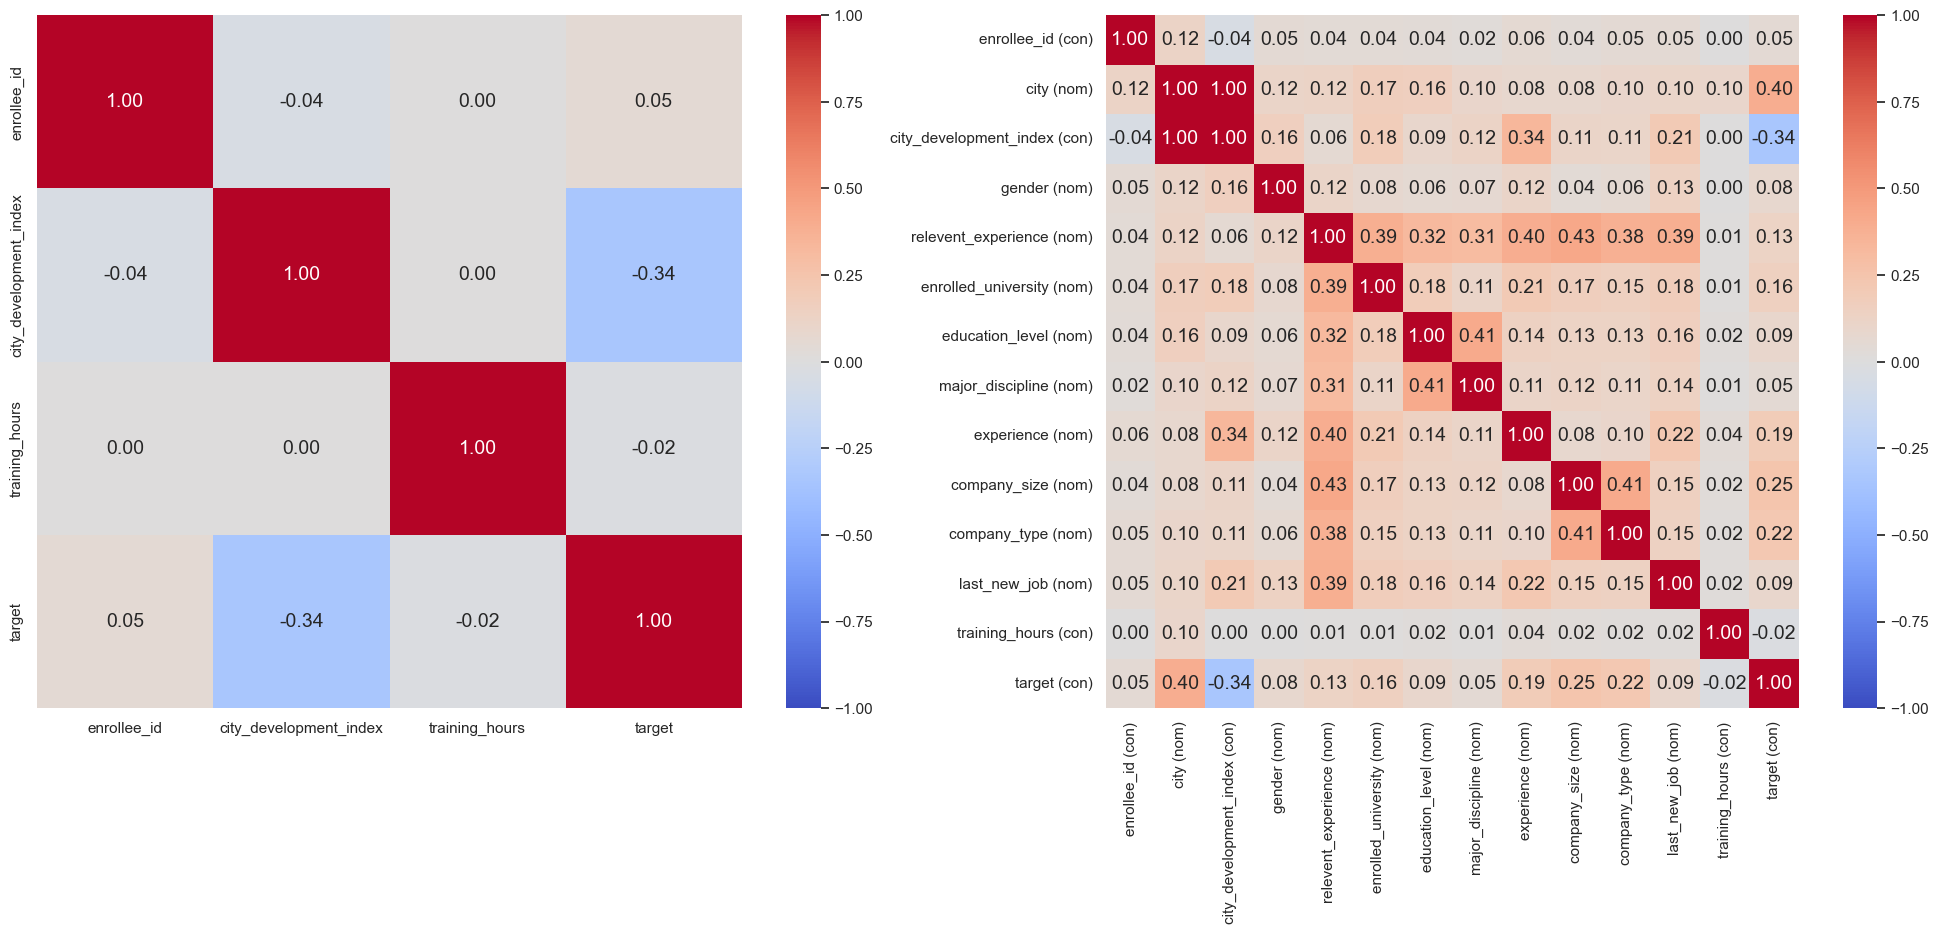

<Figure size 1600x900 with 0 Axes>

In [15]:
from dython import nominal

f, ax = plt.subplots(1,2,figsize=(25,9))
sns.heatmap(dataDummy.corr(), cmap='coolwarm', vmax=1, vmin=-1, ax=ax[0], annot=True, fmt='.2f')
nominal.associations(dataDummy, ax=ax[1], mark_columns=True, cmap='coolwarm');
plt.tight_layout()

## **Categorical**

[(0.0, 100.0), Text(0.5, 1.0, 'Top Conversion Rate by City')]

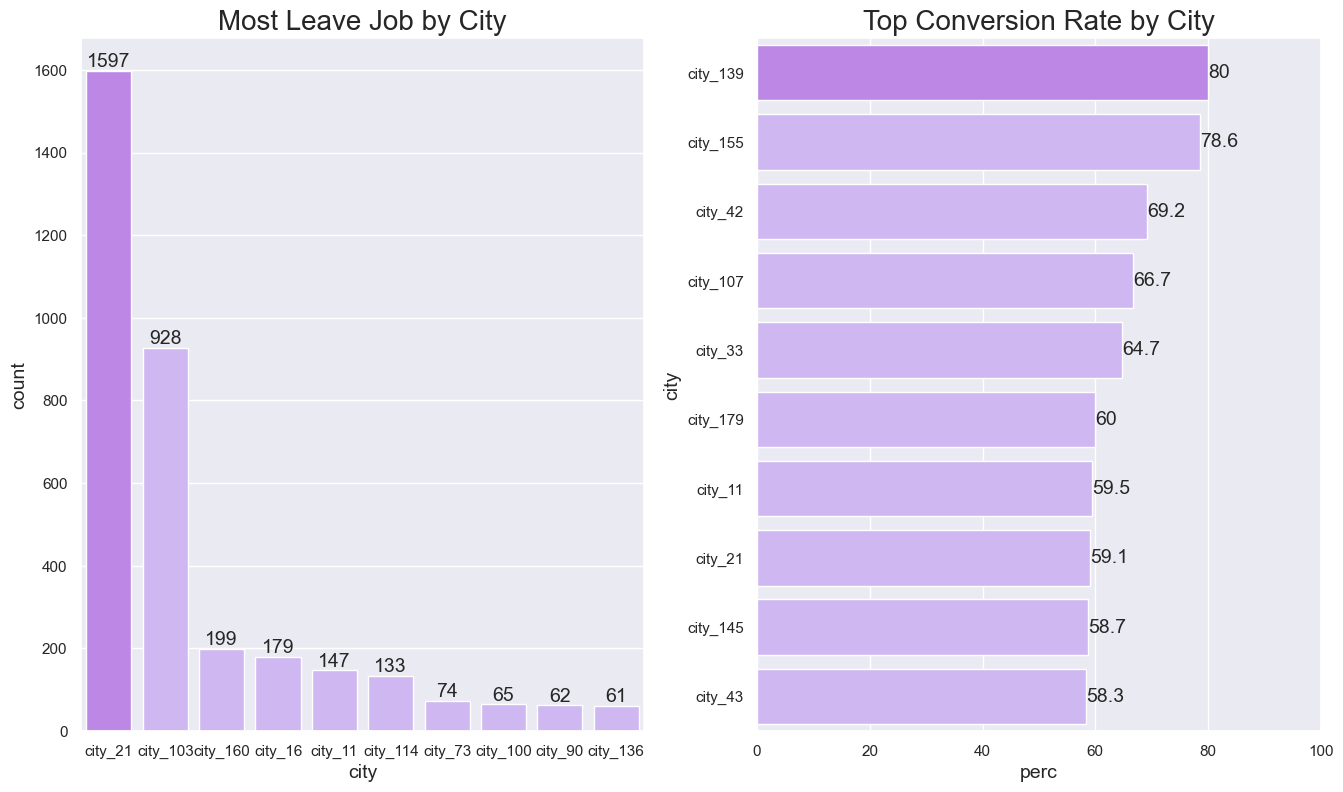

In [16]:
f, ax = plt.subplots(1,2, figsize=(16,9))

barpallete = ['xkcd:pale violet' if (x < max(dataDummy1.city.value_counts().head(10))) else 'xkcd:light purple' for x in dataDummy1.city.value_counts().head(10)]
d1 = dataDummy.groupby(['city','target']).city.count().unstack()
d1['perc'] = round((d1[1.0]/(d1[0.0]+d1[1.0]))*100,1)
d1 = d1.sort_values('perc', ascending=False).head(10).reset_index()
barpallete1 = ['xkcd:pale violet' if (x < max(d1.perc)) else 'xkcd:light purple' for x in d1.perc]

sns.countplot(ax=ax[0], data=dataDummy1, x='city', order=dataDummy1.city.value_counts().head(10).index, palette=barpallete).set(title='Most Leave Job by City')
sns.barplot(ax=ax[1], data=d1, y='city', x='perc', palette=barpallete1)
ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])
ax[1].set(xlim=[0, 100], title='Top Conversion Rate by City')

In [73]:
dataDummy.relevent_experience

0        Has relevent experience
1         No relevent experience
2         No relevent experience
3         No relevent experience
4        Has relevent experience
                  ...           
19153     No relevent experience
19154    Has relevent experience
19155    Has relevent experience
19156    Has relevent experience
19157     No relevent experience
Name: relevent_experience, Length: 19158, dtype: object

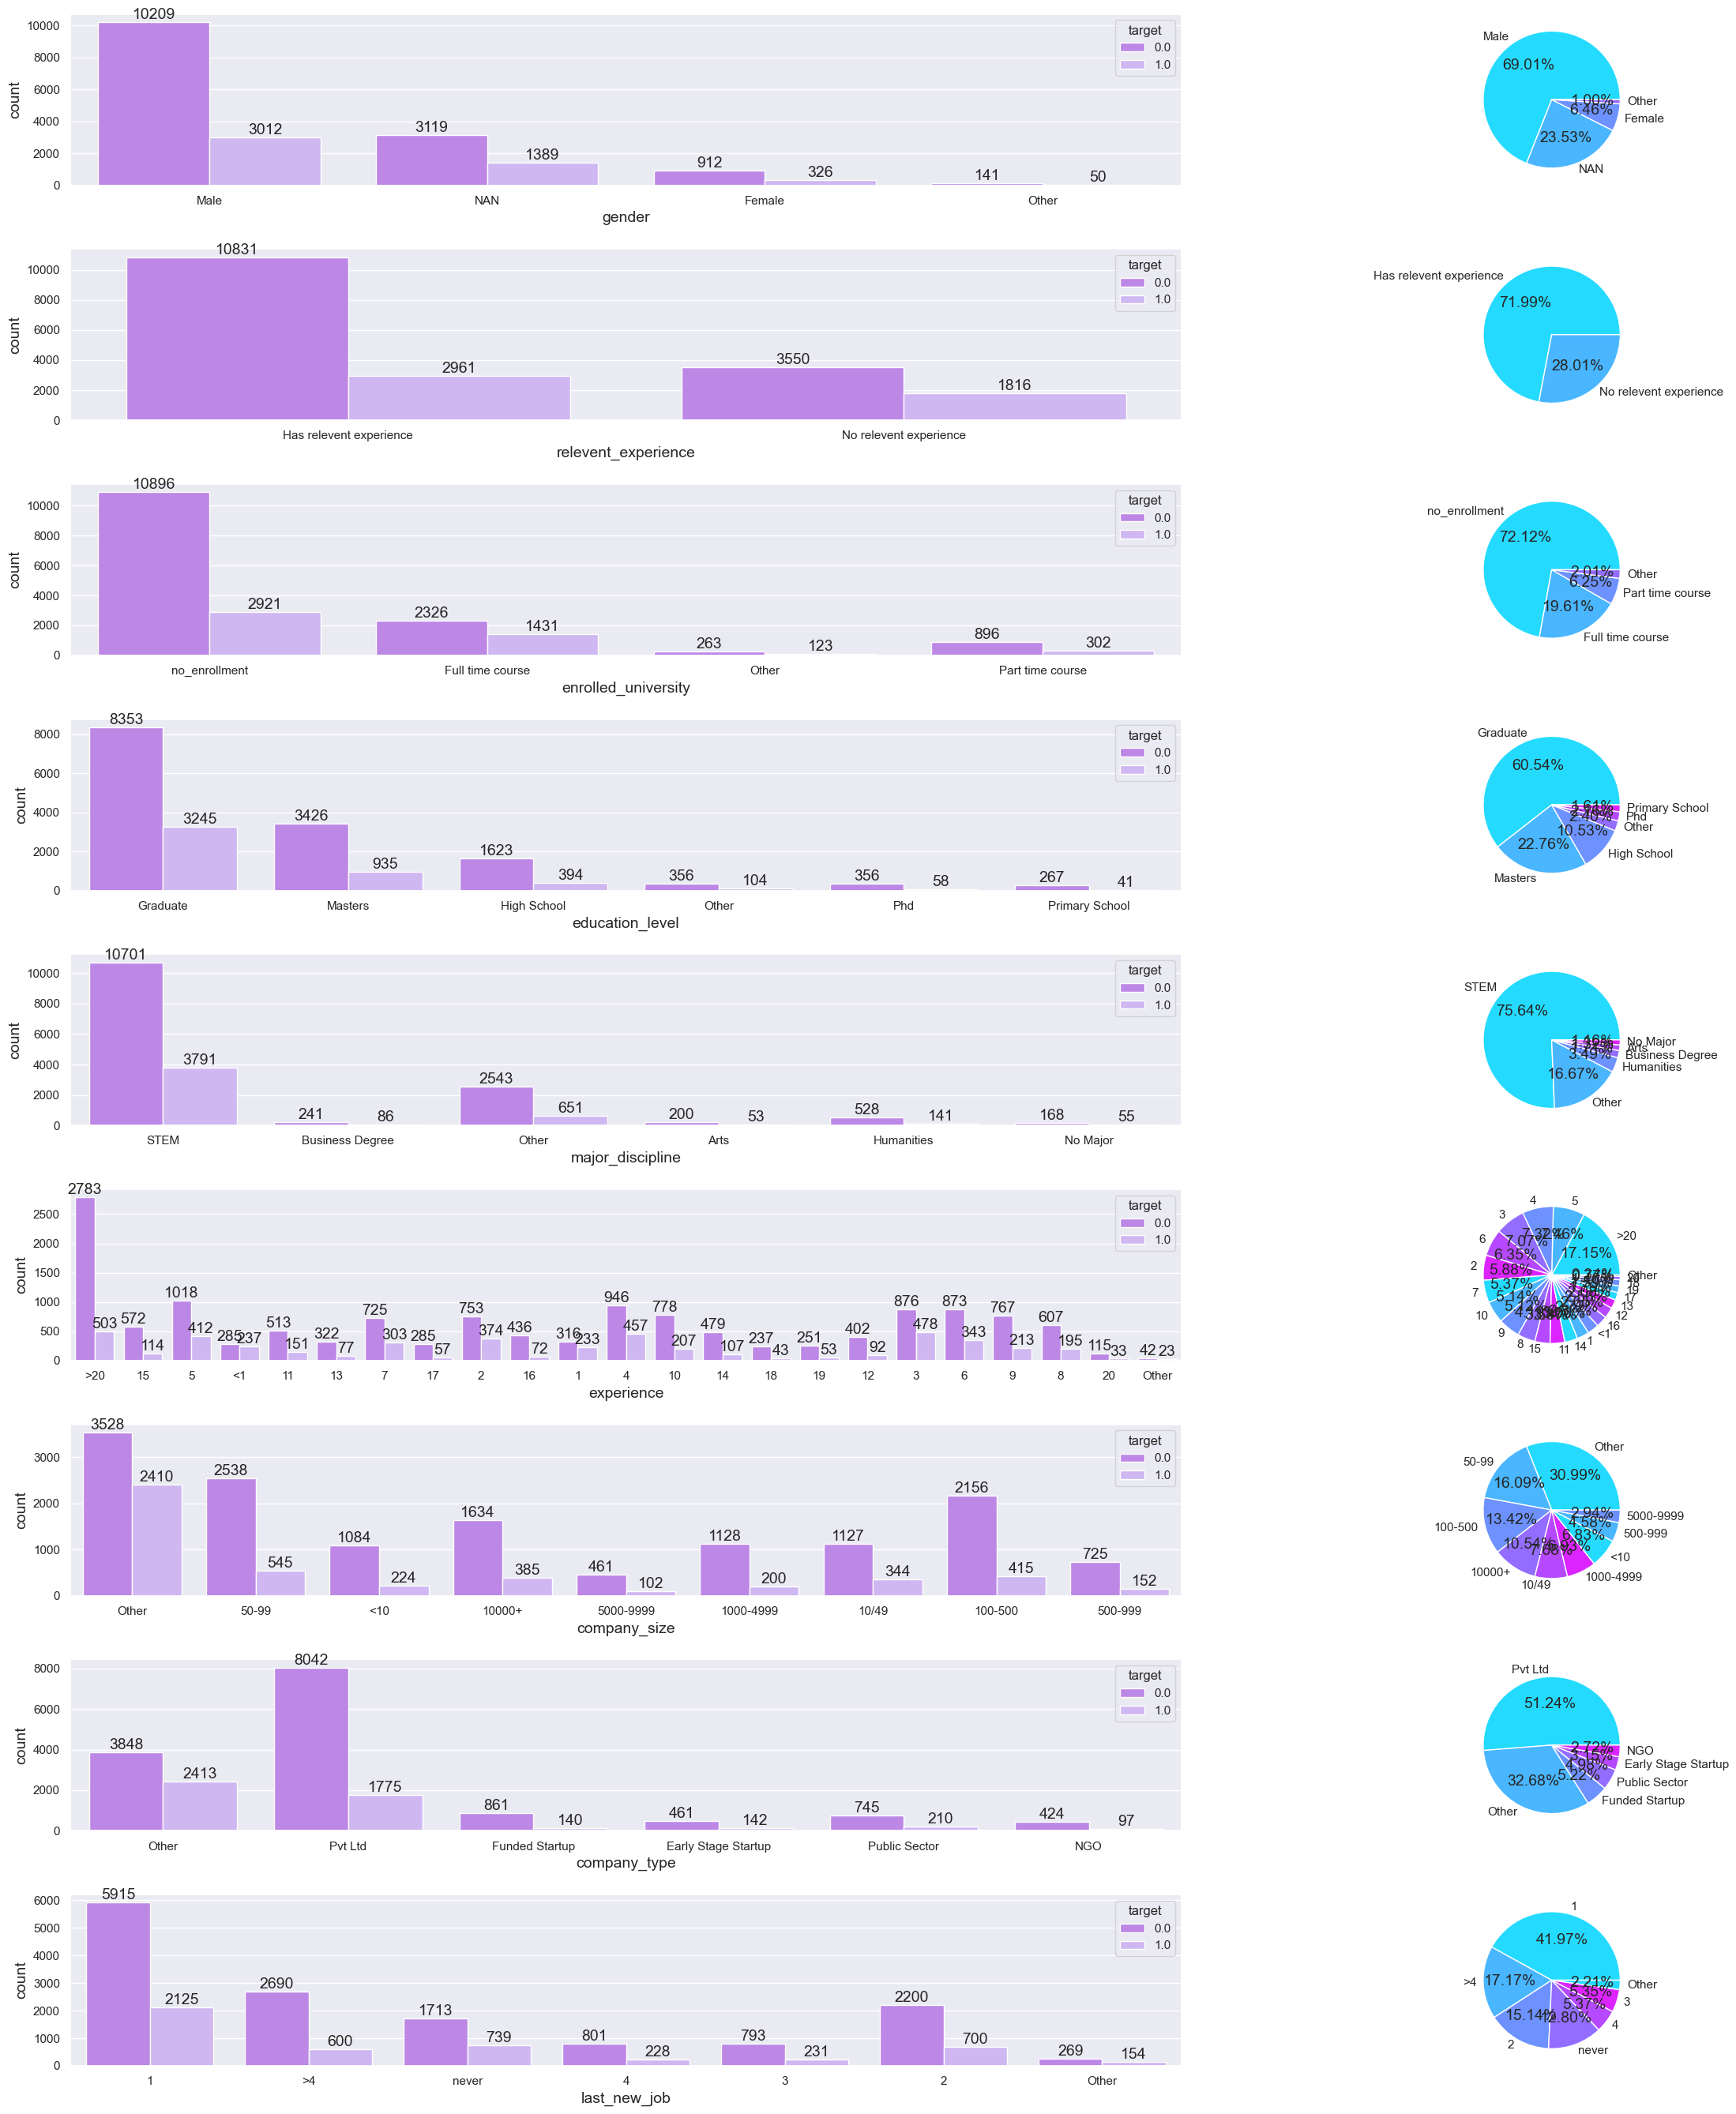

In [82]:
f, ax = plt.subplots(9,2, figsize=(27,27))
#
sns.countplot(ax=ax[0,0], data=dataDummy, x='gender', hue='target', palette=['xkcd:light purple','xkcd:pale violet'])
plt.subplot2grid((9,2),(0,1))
plt.pie(dataDummy.gender.value_counts().values, labels=dataDummy.gender.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
ax[0,0].bar_label(ax[0,0].containers[0])
ax[0,0].bar_label(ax[0,0].containers[1])
#
sns.countplot(ax=ax[1,0], data=dataDummy, x='relevent_experience', hue='target', palette=['xkcd:light purple','xkcd:pale violet'])
plt.subplot2grid((9,2),(1,1))
plt.pie(dataDummy.relevent_experience.value_counts().values, labels=dataDummy.relevent_experience.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
ax[1,0].bar_label(ax[1,0].containers[0])
ax[1,0].bar_label(ax[1,0].containers[1])
#
sns.countplot(ax=ax[2,0], data=dataDummy, x='enrolled_university', hue='target', palette=['xkcd:light purple','xkcd:pale violet'])
plt.subplot2grid((9,2),(2,1))
plt.pie(dataDummy.enrolled_university.value_counts().values, labels=dataDummy.enrolled_university.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
ax[2,0].bar_label(ax[2,0].containers[0])
ax[2,0].bar_label(ax[2,0].containers[1])
#
sns.countplot(ax=ax[3,0], data=dataDummy, x='education_level', hue='target', palette=['xkcd:light purple','xkcd:pale violet'])
plt.subplot2grid((9,2),(3,1))
plt.pie(dataDummy.education_level.value_counts().values, labels=dataDummy.education_level.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
ax[3,0].bar_label(ax[3,0].containers[0])
ax[3,0].bar_label(ax[3,0].containers[1])
#
sns.countplot(ax=ax[4,0], data=dataDummy, x='major_discipline', hue='target', palette=['xkcd:light purple','xkcd:pale violet'])
plt.subplot2grid((9,2),(4,1))
plt.pie(dataDummy.major_discipline.value_counts().values, labels=dataDummy.major_discipline.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
ax[4,0].bar_label(ax[4,0].containers[0])
ax[4,0].bar_label(ax[4,0].containers[1])
#
sns.countplot(ax=ax[5,0], data=dataDummy, x='experience', hue='target', palette=['xkcd:light purple','xkcd:pale violet'])
plt.subplot2grid((9,2),(5,1))
plt.pie(dataDummy.experience.value_counts().values, labels=dataDummy.experience.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
ax[5,0].bar_label(ax[5,0].containers[0])
ax[5,0].bar_label(ax[5,0].containers[1])
#
sns.countplot(ax=ax[6,0], data=dataDummy, x='company_size', hue='target', palette=['xkcd:light purple','xkcd:pale violet'])
plt.subplot2grid((9,2),(6,1))
plt.pie(dataDummy.company_size.value_counts().values, labels=dataDummy.company_size.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
ax[6,0].bar_label(ax[6,0].containers[0])
ax[6,0].bar_label(ax[6,0].containers[1])
#
sns.countplot(ax=ax[7,0], data=dataDummy, x='company_type', hue='target', palette=['xkcd:light purple','xkcd:pale violet'])
plt.subplot2grid((9,2),(7,1))
plt.pie(dataDummy.company_type.value_counts().values, labels=dataDummy.company_type.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
ax[7,0].bar_label(ax[7,0].containers[0])
ax[7,0].bar_label(ax[7,0].containers[1])
#
sns.countplot(ax=ax[8,0], data=dataDummy, x='last_new_job', hue='target', palette=['xkcd:light purple','xkcd:pale violet'])
plt.subplot2grid((9,2),(8,1))
plt.pie(dataDummy.last_new_job.value_counts().values, labels=dataDummy.last_new_job.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
ax[8,0].bar_label(ax[8,0].containers[0])
ax[8,0].bar_label(ax[8,0].containers[1])

plt.tight_layout()